## Clustering on Survey Data ##

In [43]:
import pandas as pd
# from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.cluster import KMeans
import seaborn as sns

In [15]:
# As zipcodes are considered to be as integer by pandas, we want to convert it to str. The zipcodes starting with 0 will have the 0 removed if we keep the data type as integer and this will be misleading

df_data = pd.read_csv('./Project_Survey.csv',dtype={'What is the ZIP code of your residence?':'str'})
df_data.head()

,Timestamp,What is your age?,Do you rent or own your home?,Which of the following genders do you most identify with?,Which of the following best describes your total annual income?,Which of the following best describes your ethnicity?,What is the ZIP code of your residence?,Which of the following best describes your current employment status?,Which option best describes your industry?,"Are you now married, widowed, divorced, separated, or never married?",Does your company participate in Habitat for Humanity donor matching program?,Which of the following non-profit organizations are you familiar with?,When was the last time you made a donation to any of the above mentioned organizations?,Roughly how much do you contribute annually in charitable donations to any organization?,When was the last time you visited a Habitat for Humanity store?,What was the purpose of your last visit to a Habitat for Humanity store?,Would you be likely to make a donation to Habitat for Humanity in the future?,Habitat for Humanity builds homes at low cost for families in need. Were you already familiar with this program?,"Were you aware of the dollar for dollar sponsorship program where industry sponsors match their employee, and sometimes public donations, to Habitat for Humanity?"
0,2022/03/02 10:56:22 AM AST,18 to 24,Rent,Male,"Under $30,000",White,28211,Student,"Not Applicable (Retired, Student, or Unemployed)",Never married,NaN,Habitat for Humanity;Goodwill;Salvation Army,Never,None,Never Visited,Have never visited a habitat for humanity loca...,Yes,Yes,No
1,2022/03/02 10:57:13 AM AST,18 to 24,Own,Male,"$100,000 to $149,999",White,28208,Employed full-time,Finance and Insurance,Never married,NaN,Habitat for Humanity;Goodwill;Salvation Army,Never,Between $100 and $500,More than a year,Donation;Shopping,Yes,No,No
2,2022/03/02 11:06:39 AM AST,25 to 34,Own,Female,"Under $30,000",Asian,28078,Student,"Not Applicable (Retired, Student, or Unemployed)",Married,I don't know,Goodwill,Never,Less than $100,Never Visited,Have never visited a habitat for humanity loca...,Maybe,No,No
3,2022/03/02 1:16:13 PM AST,35 to 44,Rent,Female,"$50,000 to $74,999",Black or African American,28078,Employed full-time,Finance and Insurance,Divorced,I don't know,Habitat for Humanity;Goodwill;Salvation Army,In last 1 year,Between $100 and $500,More than a year,Shopping,Maybe,Yes,No
4,2022/03/02 2:54:51 PM AST,55 to 64,Own,Female,"$150,000 or more",White,28031,Employed full-time,"Real Estate, Rental or Leasing",Married,No,Habitat for Humanity;Goodwill;Salvation Army,In last 1 year,"Over $10,000",In last 1 year,Shopping,Maybe,Yes,Yes


In [16]:
# Data type and no. of non-null records for each feature
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 19 columns):
 #   Column                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                              --------------  ----- 
 0   Timestamp                                                                                                                                                           144 non-null    object
 1   What is your age?                                                                                                                                                   144 non-null    object
 2   Do you rent or own your home?                                                                                             

In [17]:
# Renaming column names
name_dict = {'What is your age?':'age',
             'Do you rent or own your home?' : 'rent?',
             'Which of the following genders do you most identify with?' : 'gender',
             'Which of the following best describes your total annual income?' : 'tot_annual_income',
             'Which of the following best describes your ethnicity?' : 'ethnicity',
             'What is the ZIP code of your residence?' : 'zip_code',
             'Which of the following best describes your current employment status?' : 'employment_status',
             'Which option best describes your industry?' : 'industry',
             'Are you now married, widowed, divorced, separated, or never married?' : 'marital_status',
             'Does your company participate in Habitat for Humanity donor matching program?' : 'company_participation_donor_match',
             'Which of the following non-profit organizations are you familiar with?' : 'non_profit_familiarity',
             'When was the last time you made a donation to any of the above mentioned organizations?' : 'last_donation_made',
             'Roughly how much do you contribute annually in charitable donations to any organization?' : 'annual_contribution',
             'When was the last time you visited a Habitat for Humanity store?' : 'habitat_last_visit',
             'What was the purpose of your last visit to a Habitat for Humanity store?' : 'purpose',
             'Would you be likely to make a donation to Habitat for Humanity in the future?' : 'future_donation?',
             'Habitat for Humanity builds homes at low cost for families in need. Were you already familiar with this program?':'home_build_awareness',
             'Were you aware of the dollar for dollar sponsorship program where industry sponsors match their employee, and sometimes public donations, to Habitat for Humanity?' : 'donor_match_awareness',
             }
df_data.rename(name_dict,axis=1,inplace=True)

In [18]:
df_data.head()

,Timestamp,age,rent?,gender,tot_annual_income,ethnicity,zip_code,employment_status,industry,marital_status,company_participation_donor_match,non_profit_familiarity,last_donation_made,annual_contribution,habitat_last_visit,purpose,future_donation?,home_build_awareness,donor_match_awareness
0,2022/03/02 10:56:22 AM AST,18 to 24,Rent,Male,"Under $30,000",White,28211,Student,"Not Applicable (Retired, Student, or Unemployed)",Never married,NaN,Habitat for Humanity;Goodwill;Salvation Army,Never,None,Never Visited,Have never visited a habitat for humanity loca...,Yes,Yes,No
1,2022/03/02 10:57:13 AM AST,18 to 24,Own,Male,"$100,000 to $149,999",White,28208,Employed full-time,Finance and Insurance,Never married,NaN,Habitat for Humanity;Goodwill;Salvation Army,Never,Between $100 and $500,More than a year,Donation;Shopping,Yes,No,No
2,2022/03/02 11:06:39 AM AST,25 to 34,Own,Female,"Under $30,000",Asian,28078,Student,"Not Applicable (Retired, Student, or Unemployed)",Married,I don't know,Goodwill,Never,Less than $100,Never Visited,Have never visited a habitat for humanity loca...,Maybe,No,No
3,2022/03/02 1:16:13 PM AST,35 to 44,Rent,Female,"$50,000 to $74,999",Black or African American,28078,Employed full-time,Finance and Insurance,Divorced,I don't know,Habitat for Humanity;Goodwill;Salvation Army,In last 1 year,Between $100 and $500,More than a year,Shopping,Maybe,Yes,No
4,2022/03/02 2:54:51 PM AST,55 to 64,Own,Female,"$150,000 or more",White,28031,Employed full-time,"Real Estate, Rental or Leasing",Married,No,Habitat for Humanity;Goodwill;Salvation Army,In last 1 year,"Over $10,000",In last 1 year,Shopping,Maybe,Yes,Yes


In [19]:
df_data.shape

(144, 19)

In [20]:
print(df_data['zip_code'].unique())

['28211' '28208' '28078' '28031' '27612' '28210' '27540' '28206' '23230'
 '28203' '28403' '23434' '28205' '37343' '28202' '28027' '14510' '28278'
 '29464' '29707' '27615' '80221' '28207' '27502' '125005' '1140' '27597'
 '27127' '29440' '96161' '33496' '28164' '29715' '28204' '28214' '28270'
 '28269' '11235' '78717' '10512' '28134' '28054' '81526' '28226' '28212'
 '29720' '28215' '27606' '29732' '29611' '27103' '28012' '27613' '06070'
 '32225' '32703' '21234' '27616' '28209' '34288' '30318' '30309' '29803'
 '85339' '95822' '28173' '28277' '15232' '28117' '27617' '28262' '29708'
 '27409' '28213' '27511' '27877' '28217' '27523']


Survey was put on the social media website which led to people from countries other than US to respond, and our focus was for the United States, so the cleaning of zip codes was the important step

In [21]:
# Removing zip codes with values greater than 5 
df_data['zip_code'] = df_data['zip_code'].astype(str)
df_data.drop(df_data[df_data['zip_code'].str.len() != 5 ].index,inplace=True)

In [22]:
# Check if the zip code statrting from 0 is still present in the data
df_data[df_data['zip_code']=='06070']

,Timestamp,age,rent?,gender,tot_annual_income,ethnicity,zip_code,employment_status,industry,marital_status,company_participation_donor_match,non_profit_familiarity,last_donation_made,annual_contribution,habitat_last_visit,purpose,future_donation?,home_build_awareness,donor_match_awareness
77,2022/03/03 9:39:37 PM AST,25 to 34,Own,Female,"$75,000 to $99,999",White,06070,Employed full-time,Software,Married,No,Habitat for Humanity;Goodwill;Salvation Army,In last 1 year,Less than $100,Never Visited,NaN,Maybe,Yes,No


In [23]:
# Dataset size after removing zipcodes outside of United States
df_data.shape

(142, 19)

In [24]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 143
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Timestamp                          142 non-null    object
 1   age                                142 non-null    object
 2   rent?                              141 non-null    object
 3   gender                             142 non-null    object
 4   tot_annual_income                  142 non-null    object
 5   ethnicity                          142 non-null    object
 6   zip_code                           142 non-null    object
 7   employment_status                  142 non-null    object
 8   industry                           142 non-null    object
 9   marital_status                     142 non-null    object
 10  company_participation_donor_match  139 non-null    object
 11  non_profit_familiarity             141 non-null    object
 12  last_don

In [25]:
# Finding null values for each column
df_data.isnull().sum() 

Timestamp                            0
age                                  0
rent?                                1
gender                               0
tot_annual_income                    0
ethnicity                            0
zip_code                             0
employment_status                    0
industry                             0
marital_status                       0
company_participation_donor_match    3
non_profit_familiarity               1
last_donation_made                   0
annual_contribution                  1
habitat_last_visit                   0
purpose                              6
future_donation?                     0
home_build_awareness                 0
donor_match_awareness                0
dtype: int64

In [26]:
# Retrieve rows with null values
df_data[df_data.isnull().any(axis=1)]

,Timestamp,age,rent?,gender,tot_annual_income,ethnicity,zip_code,employment_status,industry,marital_status,company_participation_donor_match,non_profit_familiarity,last_donation_made,annual_contribution,habitat_last_visit,purpose,future_donation?,home_build_awareness,donor_match_awareness
0,2022/03/02 10:56:22 AM AST,18 to 24,Rent,Male,"Under $30,000",White,28211,Student,"Not Applicable (Retired, Student, or Unemployed)",Never married,NaN,Habitat for Humanity;Goodwill;Salvation Army,Never,None,Never Visited,Have never visited a habitat for humanity loca...,Yes,Yes,No
1,2022/03/02 10:57:13 AM AST,18 to 24,Own,Male,"$100,000 to $149,999",White,28208,Employed full-time,Finance and Insurance,Never married,NaN,Habitat for Humanity;Goodwill;Salvation Army,Never,Between $100 and $500,More than a year,Donation;Shopping,Yes,No,No
16,2022/03/02 5:06:57 PM AST,25 to 34,Own,Male,"$150,000 or more",Asian,28078,Employed full-time,Software,Married,No,Habitat for Humanity;Goodwill;Salvation Army,More than a year,None,Never Visited,NaN,Yes,Yes,Yes
54,2022/03/03 12:17:57 PM AST,45 to 54,Own,Female,Prefer not to say,White,78717,Employed full-time,Software,Married,I don't know,Habitat for Humanity;Goodwill;Salvation Army,In last 1 month,NaN,More than a year,Shopping,Maybe,Yes,No
55,2022/03/03 12:18:21 PM AST,35 to 44,Own,Female,"$150,000 or more",White,10512,Employed full-time,Software,Married,I don't know,Habitat for Humanity;Goodwill;Salvation Army,In last 1 year,Between $100 and $500,Never Visited,NaN,Maybe,Yes,No
77,2022/03/03 9:39:37 PM AST,25 to 34,Own,Female,"$75,000 to $99,999",White,06070,Employed full-time,Software,Married,No,Habitat for Humanity;Goodwill;Salvation Army,In last 1 year,Less than $100,Never Visited,NaN,Maybe,Yes,No
84,2022/03/04 2:37:27 PM AST,18 to 24,Own,Female,"$50,000 to $74,999",White,34288,Employed full-time,"Arts, Entertainment, and Recreation",Never married,I don't know,Habitat for Humanity;Goodwill;Salvation Army,In last 1 year,Between $100 and $500,Never Visited,NaN,Yes,No,No
99,2022/03/06 6:41:55 PM AST,35 to 44,NaN,Male,"$150,000 or more",Asian,28277,Employed full-time,Software,Married,Yes,Habitat for Humanity;Goodwill;Salvation Army,More than a year,Between $1500 and $2500,Never Visited,Have never visited a habitat for humanity loca...,Yes,Yes,Yes
109,2022/03/08 11:00:28 AM AST,45 to 54,Own,Female,"$100,000 to $149,999",White,29708,Employed part-time,Software,Married,I don't know,Habitat for Humanity;Goodwill;Salvation Army,In last 1 year,Between $100 and $500,Never Visited,NaN,Maybe,Yes,No
125,2022/03/13 9:54:06 PM AST,45 to 54,Rent,Male,"$100,000 to $149,999",Asian,28210,Employed full-time,Software,Married,Yes,NaN,Never,Between $100 and $500,More than a year,Donation;Shopping,Maybe,No,No


In [27]:
# For row_index=54, person has donated in last month, but has not mentioned annual_contribution, so putting the lowest value - "Less than $100"
df_data.loc[54,'annual_contribution'] = 'Less than $100'

In [28]:
df_data.loc[54]

Timestamp                                              2022/03/03 12:17:57 PM AST
age                                                                      45 to 54
rent?                                                                         Own
gender                                                                     Female
tot_annual_income                                               Prefer not to say
ethnicity                                                                   White
zip_code                                                                    78717
employment_status                                              Employed full-time
industry                                                                 Software
marital_status                                                            Married
company_participation_donor_match                                    I don't know
non_profit_familiarity               Habitat for Humanity;Goodwill;Salvation Army
last_donation_ma

In [29]:
# Finding null values for each column
df_data.isnull().sum() 

Timestamp                            0
age                                  0
rent?                                1
gender                               0
tot_annual_income                    0
ethnicity                            0
zip_code                             0
employment_status                    0
industry                             0
marital_status                       0
company_participation_donor_match    3
non_profit_familiarity               1
last_donation_made                   0
annual_contribution                  0
habitat_last_visit                   0
purpose                              6
future_donation?                     0
home_build_awareness                 0
donor_match_awareness                0
dtype: int64

In [30]:
# Retrieving columns on which Kmeans clusters will be made, by doing Ordinal Encoding
df_features = ['tot_annual_income','last_donation_made','annual_contribution','future_donation?']
df_cluster_data = df_data[df_features].copy()
df_cluster_data.head()

,tot_annual_income,last_donation_made,annual_contribution,future_donation?
0,"Under $30,000",Never,None,Yes
1,"$100,000 to $149,999",Never,Between $100 and $500,Yes
2,"Under $30,000",Never,Less than $100,Maybe
3,"$50,000 to $74,999",In last 1 year,Between $100 and $500,Maybe
4,"$150,000 or more",In last 1 year,"Over $10,000",Maybe


In [31]:
# Get the unique values for all the columns to be used for K-Means clustering
for col in df_features:
    print(f'The unique values for {col} are: ')
    print(df_cluster_data[col].unique())

The unique values for tot_annual_income are: 
['Under $30,000' '$100,000 to $149,999' '$50,000 to $74,999'
 '$150,000 or more' '$75,000 to $99,999' 'Prefer not to say'
 '$30,000 to $49,999']
The unique values for last_donation_made are: 
['Never' 'In last 1 year' 'More than a year' 'In last 1 week'
 'In last 1 month']
The unique values for annual_contribution are: 
['None' 'Between $100 and $500' 'Less than $100' 'Over $10,000'
 'Between $1500 and $2500' 'Between $500 and $1500'
 'between $2500 and $10,000']
The unique values for future_donation? are: 
['Yes' 'Maybe' 'No']


In [32]:
# The values in the list from left to right has weights lowest to highest. We will pass this list to Ordinalencoder, to make it assign codes
# based on our order
income_list = ['Prefer not to say','Under $30,000','$30,000 to $49,999','$50,000 to $74,999','$75,000 to $99,999','$100,000 to $149,999','$150,000 or more']
last_donation_list = ['Never','In last 1 week','In last 1 month','More than a year','In last 1 year']
annual_contribution_list = ['None','Less than $100','Between $100 and $500','Between $500 and $1500','Between $1500 and $2500','between $2500 and $10,000','Over $10,000',]
future_donation_list = ['No','Maybe','Yes']

In [33]:
# Instantiating Ordinal Encoder
oe = OrdinalEncoder(categories=[income_list,last_donation_list,annual_contribution_list,future_donation_list])

oe.fit_transform(df_cluster_data[['tot_annual_income','last_donation_made','annual_contribution','future_donation?']])[:8]

array([[1., 0., 0., 2.],
       [5., 0., 2., 2.],
       [1., 0., 1., 1.],
       [3., 4., 2., 1.],
       [6., 4., 6., 1.],
       [1., 3., 2., 1.],
       [6., 3., 1., 1.],
       [6., 3., 1., 0.]])

In [34]:
df_cluster_data.head(8)

,tot_annual_income,last_donation_made,annual_contribution,future_donation?
0,"Under $30,000",Never,None,Yes
1,"$100,000 to $149,999",Never,Between $100 and $500,Yes
2,"Under $30,000",Never,Less than $100,Maybe
3,"$50,000 to $74,999",In last 1 year,Between $100 and $500,Maybe
4,"$150,000 or more",In last 1 year,"Over $10,000",Maybe
5,"Under $30,000",More than a year,Between $100 and $500,Maybe
6,"$150,000 or more",More than a year,Less than $100,Maybe
7,"$150,000 or more",More than a year,Less than $100,No


In [35]:
df_transformed = pd.DataFrame(data=oe.fit_transform(df_cluster_data[['tot_annual_income','last_donation_made','annual_contribution','future_donation?']]),
                              columns=['tot_annual_income','last_donation_made','annual_contribution','future_donation?'])
df_transformed.head(8)                              

,tot_annual_income,last_donation_made,annual_contribution,future_donation?
0,1.0,0.0,0.0,2.0
1,5.0,0.0,2.0,2.0
2,1.0,0.0,1.0,1.0
3,3.0,4.0,2.0,1.0
4,6.0,4.0,6.0,1.0
5,1.0,3.0,2.0,1.0
6,6.0,3.0,1.0,1.0
7,6.0,3.0,1.0,0.0


**Elbow method to find the optimal number of clusters**

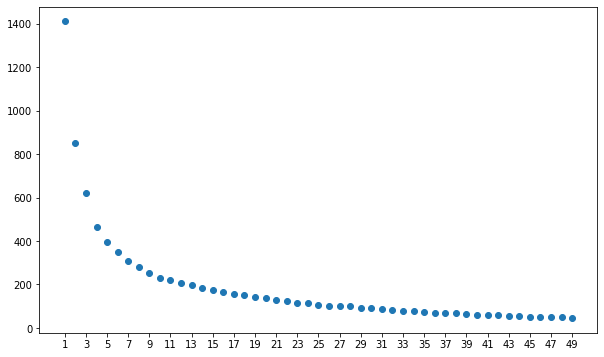

In [45]:
# Elbow curve to find optimal clusters
sse = []
for n in range(1, 50):
  kmeans = KMeans(n_clusters=n, random_state=0).fit(df_transformed)
  sse.append(kmeans.inertia_)
# Plotting the sse
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 50), sse)
plt.xticks(range(1, 50, 2))
plt.show()

In [37]:
# Performing K-means clustering on the transformed dataset
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_transformed)

In [38]:
pd.DataFrame(kmeans.cluster_centers_, columns=['Total Income', 'Last Donation Made', 'Annual contribution', 'Intent to Donate']).round(decimals=1)

,Total Income,Last Donation Made,Annual contribution,Intent to Donate
0,0.8,3.0,2.0,1.2
1,5.5,2.5,3.8,1.7
2,2.6,0.0,0.9,1.1
3,4.4,3.5,1.7,1.2


In [39]:
#Cluster Values
kmeans.labels_

array([2, 2, 2, 3, 1, 0, 3, 3, 0, 0, 3, 1, 3, 3, 0, 1, 3, 1, 3, 0, 2, 3,
       3, 2, 3, 3, 1, 0, 0, 1, 2, 3, 3, 3, 1, 0, 0, 3, 0, 3, 0, 3, 2, 1,
       1, 1, 3, 0, 1, 2, 3, 1, 0, 3, 1, 1, 1, 2, 1, 1, 3, 2, 1, 0, 3, 3,
       3, 0, 3, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 2,
       2, 0, 0, 3, 3, 2, 1, 1, 1, 1, 3, 0, 1, 1, 0, 1, 3, 3, 3, 3, 0, 3,
       3, 1, 0, 1, 1, 0, 0, 1, 1, 3, 3, 3, 1, 2, 0, 0, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 0, 2, 0, 2, 3])

In [40]:
# Assigning Cluster Values to the data
df_data['cluster'] = kmeans.labels_
df_data.head()

,Timestamp,age,rent?,gender,tot_annual_income,ethnicity,zip_code,employment_status,industry,marital_status,company_participation_donor_match,non_profit_familiarity,last_donation_made,annual_contribution,habitat_last_visit,purpose,future_donation?,home_build_awareness,donor_match_awareness,cluster
0,2022/03/02 10:56:22 AM AST,18 to 24,Rent,Male,"Under $30,000",White,28211,Student,"Not Applicable (Retired, Student, or Unemployed)",Never married,NaN,Habitat for Humanity;Goodwill;Salvation Army,Never,None,Never Visited,Have never visited a habitat for humanity loca...,Yes,Yes,No,2
1,2022/03/02 10:57:13 AM AST,18 to 24,Own,Male,"$100,000 to $149,999",White,28208,Employed full-time,Finance and Insurance,Never married,NaN,Habitat for Humanity;Goodwill;Salvation Army,Never,Between $100 and $500,More than a year,Donation;Shopping,Yes,No,No,2
2,2022/03/02 11:06:39 AM AST,25 to 34,Own,Female,"Under $30,000",Asian,28078,Student,"Not Applicable (Retired, Student, or Unemployed)",Married,I don't know,Goodwill,Never,Less than $100,Never Visited,Have never visited a habitat for humanity loca...,Maybe,No,No,2
3,2022/03/02 1:16:13 PM AST,35 to 44,Rent,Female,"$50,000 to $74,999",Black or African American,28078,Employed full-time,Finance and Insurance,Divorced,I don't know,Habitat for Humanity;Goodwill;Salvation Army,In last 1 year,Between $100 and $500,More than a year,Shopping,Maybe,Yes,No,3
4,2022/03/02 2:54:51 PM AST,55 to 64,Own,Female,"$150,000 or more",White,28031,Employed full-time,"Real Estate, Rental or Leasing",Married,No,Habitat for Humanity;Goodwill;Salvation Army,In last 1 year,"Over $10,000",In last 1 year,Shopping,Maybe,Yes,Yes,1


In [41]:
# Assigning Cluster Values to the data
df_transformed['cluster'] = kmeans.labels_
df_transformed.head()
df_cluster_data['cluster'] = kmeans.labels_
df_cluster_data.head()

,tot_annual_income,last_donation_made,annual_contribution,future_donation?,cluster
0,"Under $30,000",Never,None,Yes,2
1,"$100,000 to $149,999",Never,Between $100 and $500,Yes,2
2,"Under $30,000",Never,Less than $100,Maybe,2
3,"$50,000 to $74,999",In last 1 year,Between $100 and $500,Maybe,3
4,"$150,000 or more",In last 1 year,"Over $10,000",Maybe,1


**Plotting the clusters**

In [42]:
fig = px.scatter_3d(df_cluster_data, x='tot_annual_income', y='last_donation_made', z='annual_contribution',
              symbol='future_donation?', color='cluster', width=1000, height=1000)


fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()